In [1]:
import pandas as pd


# Use read_csv() to load the CSV file into a pandas DataFrame
data = pd.read_csv('full_data.csv',low_memory=False)

bs_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call'
]


bs_data = data[bs_variables]

FileNotFoundError: [Errno 2] No such file or directory: 'full_data.csv'

In [29]:
call_data = bs_data[bs_data['call'] == 1]
put_data = bs_data[bs_data['call'] == 0]

call_data = call_data.drop(columns=['call'])
put_data = put_data.drop(columns=['call'])

In [30]:
import numpy as np
from scipy.stats import norm
from datetime import datetime

def black_scholes_call(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

    return call_price

def black_scholes_put(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    put_price = K * np.exp(-r * tau) * norm.cdf(-d2) - S *norm.cdf(-d1)

    return put_price

#S, K, T, r, sigma,option_type

call_data['BS'] = bs_data.apply(black_scholes_call, axis=1)
put_data['BS'] = bs_data.apply(black_scholes_put, axis=1)

C:\Users\domen\AppData\Local\Temp\ipykernel_15664\1129392485.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
C:\Users\domen\AppData\Local\Temp\ipykernel_15664\1129392485.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
call_mse = mean_squared_error(call_data['price'], call_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
call_rmse = np.sqrt(call_mse)

# Calculate Mean Absolute Error (MAE)
call_mae = mean_absolute_error(call_data['price'], call_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
call_mape = np.mean(np.abs((call_data['price'] - call_data['BS']) / call_data['price'])) * 100

# Calculate R-squared
call_r_squared = r2_score(call_data['price'], call_data['BS'])

print("Mean Squared Error (MSE):", call_mse)
print("Root Mean Squared Error (RMSE):", call_rmse)
print("Mean Absolute Error (MAE):", call_mae)
print("Mean Absolute Percentage Error (MAPE):", call_mape)
print("R-squared:", call_r_squared)


Mean Squared Error (MSE): 738.4851896985668
Root Mean Squared Error (RMSE): 27.17508398696436
Mean Absolute Error (MAE): 6.028726054798002
Mean Absolute Percentage Error (MAPE): 1355.7966373076001
R-squared: 0.8812776557715233


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
put_mse = mean_squared_error(put_data['price'], put_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
put_rmse = np.sqrt(put_mse)

# Calculate Mean Absolute Error (MAE)
put_mae = mean_absolute_error(put_data['price'], put_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
put_mape = np.mean(np.abs((put_data['price'] - put_data['BS']) / put_data['price'])) * 100

# Calculate R-squared
put_r_squared = r2_score(put_data['price'], put_data['BS'])

print("Mean Squared Error (MSE):", put_mse)
print("Root Mean Squared Error (RMSE):", put_rmse)
print("Mean Absolute Error (MAE):", put_mae)
print("Mean Absolute Percentage Error (MAPE):", put_mape)
print("R-squared:", put_r_squared)


Mean Squared Error (MSE): 811.7605288498038
Root Mean Squared Error (RMSE): 28.491411492760477
Mean Absolute Error (MAE): 7.018114286790296
Mean Absolute Percentage Error (MAPE): 2410.327402866601
R-squared: 0.49454111246217103


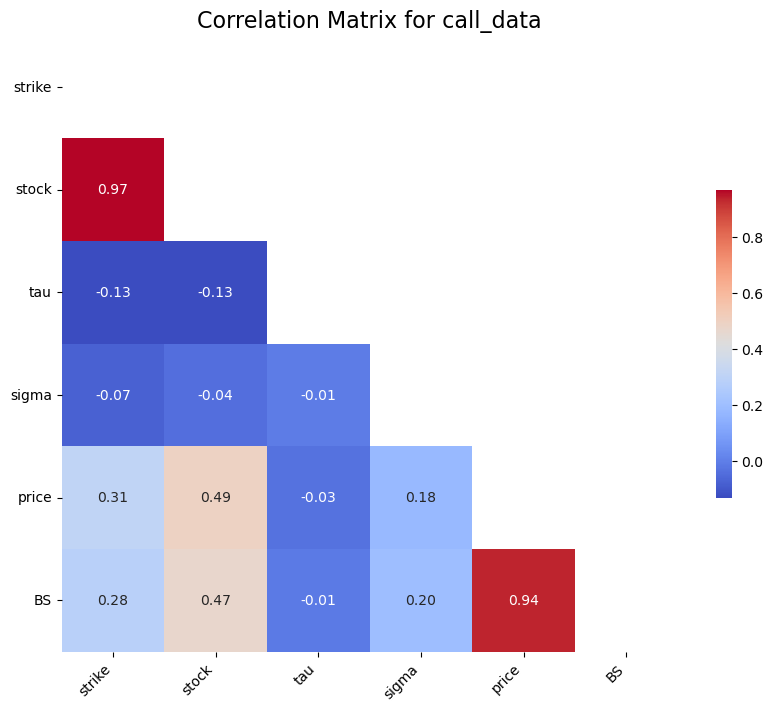

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
correlation_matrix = call_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, mask=mask)

# Add titles and labels
plt.title('Correlation Matrix for call_data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


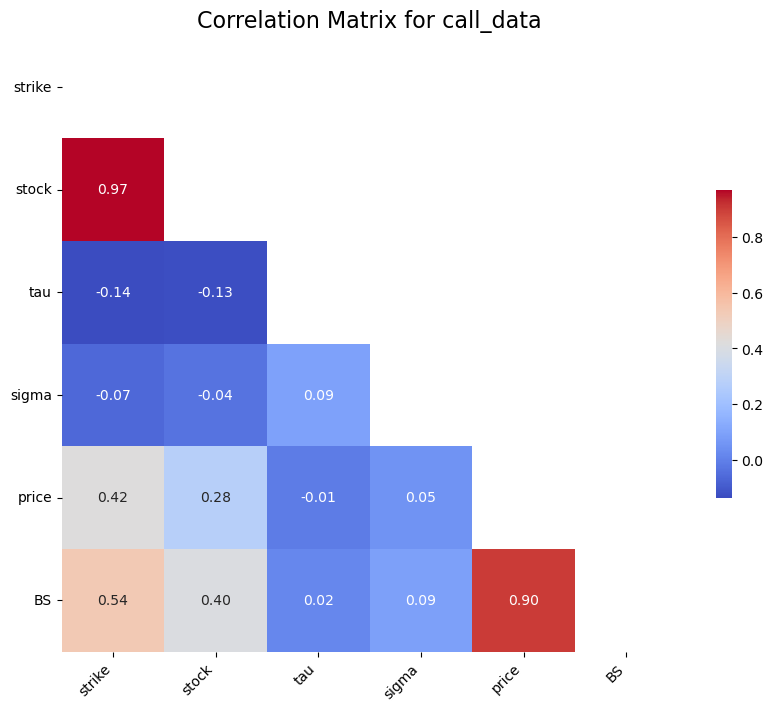

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
correlation_matrix = put_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, mask=mask)

# Add titles and labels
plt.title('Correlation Matrix for call_data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


In [36]:
call_data = call_data[call_data['sigma'] > 0]
put_data = put_data[put_data['sigma'] > 0]

In [38]:
put_data

,strike,stock,tau,sigma,price,BS
65,210.0,406.22,0.031746,2.750003,0.01,5.735963
66,220.0,404.52,0.019841,2.562504,0.02,1.993622
67,235.0,405.57,0.095238,3.277346,0.02,53.861479
68,250.0,404.06,0.091270,2.062505,0.02,24.059302
69,255.0,414.92,0.047619,2.000005,0.02,9.205894
...,...,...,...,...,...,...
73556,4.0,3.48,0.642857,0.000010,2.15,0.412194
73557,4.5,1.06,0.083333,4.062505,3.40,3.544190
73558,5.5,2.36,0.436508,0.000010,3.43,3.038907
73564,1.0,11.65,0.464286,4.578129,0.25,0.654618
